In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
veri = pd.read_csv("StudentsPerformance.csv")
veri

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [28]:
veri.dtypes
##VERİ TİPLERİNİ İNCELEDİM.BAZEN STRİNG VE INTEGER İFADELERİ OBJE DURUMUNA ÇEVİRİP VERİ ÜZERİNDE ÖYLE İŞLEMLER YAPMALIYIZ.
## FAKAT BURDA HERHANGİ BİR PROBLEM GÖZÜKMÜYOR BU ŞEKİLDE DEVAM EDEBİLİRİZ.

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [3]:
veri.isna().sum() ## SÜTUNLARIMIZDA EKSİK VERİ SAYISI KAÇ DİYE KONTROL ETTİM.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
veri.isnull() #EKSİK VERİLERİN KONTROLÜNÜ SAĞLADIM YİNE

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [5]:
veri.dropna()
veri              ## EKSİK VERİMİZ YOKTU FAKAT YİNEDE VAR İSE DROPNA METODU İLE EKSİK VERİLERİMİZİ KALDIRDIK.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
veri.duplicated().value_counts() 
## TEKRAR EDEN VERİ KONTROLÜ YAPTIM. 1000 SATIRIMDA FALSE DEĞERİ DÖNMÜŞ. DEMEK Kİ TEKRAR EDEN VERİM YOK. EĞER OLSAYDI
## drop_duplicates() METODU İLE KALDIRIRDIK.

False    1000
dtype: int64

In [7]:
group = veri["race/ethnicity"].value_counts() 
group
## SÜTUN VERİLERİMDE NELER YAZDIĞINI ŞÖYLE BİR YÜZEYSEL GÖRÜP VERİ SETİME HAKİM OLABİLMEM AMACIYLA HER SÜTUNA BU İŞLEMLERİ UYGULAYACAĞIM

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [8]:
parentLevel = veri["parental level of education"].value_counts()
parentLevel

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
lunch = veri["lunch"].value_counts()
lunch

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [10]:
testPre = veri["test preparation course"].value_counts()
testPre

none         642
completed    358
Name: test preparation course, dtype: int64

Text(0, 0.5, 'COUNT')

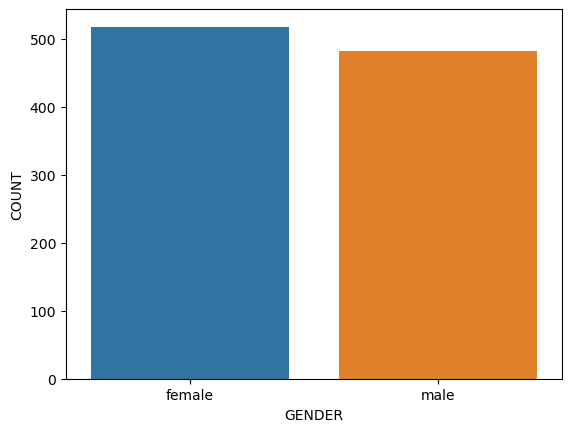

In [11]:
sns.countplot(x="gender", data=veri)
sns.set_palette("husl", 2)
plt.xlabel("GENDER")
plt.ylabel('COUNT')

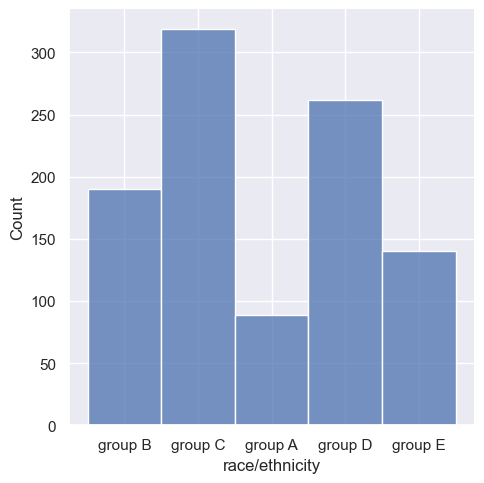

In [12]:
sns.set_theme(style="darkgrid")
sns.displot(
    veri, x="race/ethnicity",
    binwidth=50, height=5 
)

In [13]:
# SINAV PUANLARI İÇİN AYRI BİR TABLO OLUŞTURDUM.
studentScore = veri[["math score","reading score","writing score"]]
studentScore

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [14]:
# CUT METODUNU KULLANARAK PUANLARI BELLİ ARALIKLARA BÖLDÜM. BU BÖLDÜĞÜM ARALIĞI BAŞKA BİR DEĞİŞKENDE TUTTUKTAN SONRA BAR GRAFİĞİ HAZIRLADIM.
############################## BİRDEN FAZLA KULLANACAĞIM DEĞİŞKENLERİ BURADA TUTUYORUM ###################
scoreLevel = [0,40,60,75,85,100]
levelType = ["bad","low","intermediate","good","excellent"]
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral', 'pink']
##########################################################################################################

In [15]:
########################################## MATH SCORE İNCELEME VE Pie GRAFİĞİ ###################################
MatScoreCut = pd.cut(studentScore["math score"], scoreLevel,labels=levelType)
MatScoreCounts = MatScoreCut.value_counts()
MatScoreCounts

intermediate    387
low             289
good            171
excellent       103
bad              49
Name: math score, dtype: int64

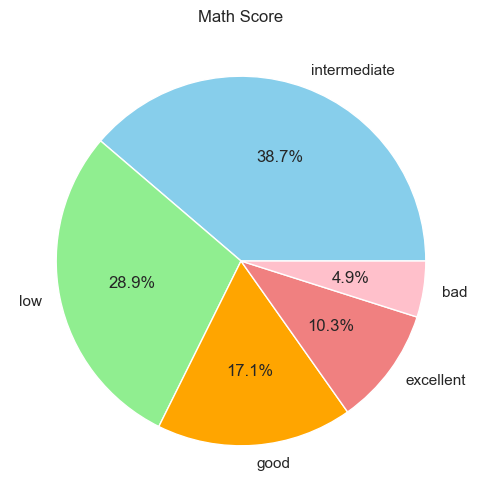

In [16]:
plt.figure(figsize=(8, 6))
plt.title("Math Score")
patches, texts, autotexts = plt.pie(MatScoreCounts.values, labels=MatScoreCounts.index, autopct='%1.1f%%', colors=colors)

In [17]:
############################# READİNG SCORE İNCELEME VE Pie GRAFİĞİ #################################
ReadScoreCut = pd.cut(studentScore["reading score"], scoreLevel,labels=levelType)
ReadScoreCounts = ReadScoreCut.value_counts()
ReadScoreCounts

intermediate    381
low             248
good            212
excellent       132
bad              27
Name: reading score, dtype: int64

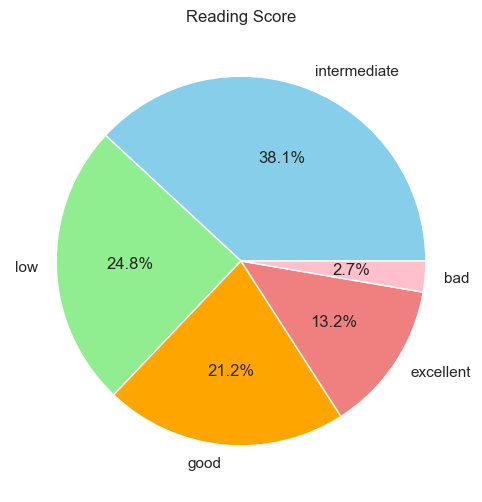

In [18]:
plt.figure(figsize=(8, 6))
plt.title("Reading Score")
patches, texts, autotexts = plt.pie(ReadScoreCounts.values, labels=ReadScoreCounts.index, autopct='%1.1f%%',colors=colors)

In [19]:
####################################### WRITING SCORE İNCELEME VE Pie GRAFİĞİ ##############################
WriteScoreCut = pd.cut(studentScore["writing score"], scoreLevel,labels=levelType)
WriteScoreCounts = WriteScoreCut.value_counts()
WriteScoreCounts

intermediate    371
low             266
good            207
excellent       121
bad              35
Name: writing score, dtype: int64

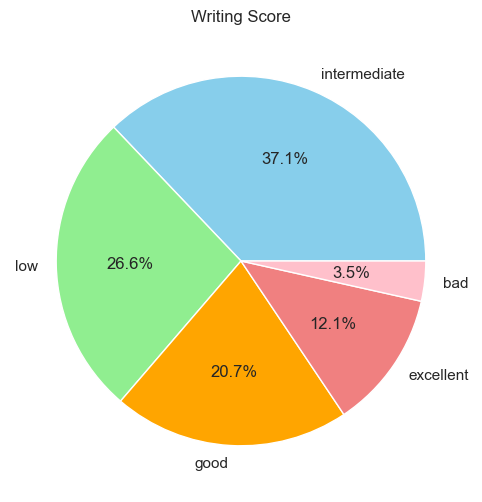

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Writing Score")
patches, texts, autotexts = plt.pie(WriteScoreCounts.values, labels=WriteScoreCounts.index, autopct='%1.1f%%',colors=colors)

In [21]:
#### EBEVEYNLERİN LİSANS DERECELERİNİ VE SINAV PUANLARINI BİRLEŞTİRDİM. BİRLEŞTİRMEMDEKİ AMAÇ İKİSİ ARASINDAKİ İLİŞKİYİ İNCELEMEK.
x =  pd.concat([veri["parental level of education"],studentScore], axis=1)
x

,parental level of education,math score,reading score,writing score
0,bachelor's degree,72,72,74
1,some college,69,90,88
2,master's degree,90,95,93
3,associate's degree,47,57,44
4,some college,76,78,75
...,...,...,...,...
995,master's degree,88,99,95
996,high school,62,55,55
997,high school,59,71,65
998,some college,68,78,77


In [22]:
## EBEVEYNLERİN LİSANS DERECELERİNİ GROUP BY METODU İLE GRUP HALİNE GETİRDİM. DAHA SONRA BUNLARA KARŞILIK GELEN PUANLARIN ORTALAMASINI ALARAK 
## BİR DEĞİŞKENDE TUTTUM VE BU DEĞİŞKENİN BAR GRAFİĞİNİ ÇIKARARAK EBEVEYNLERİN ÇOCUKLARININ ÜSTÜNDE Kİ PUANLARA ETKİSİNİ İNCELEMEYE ÇALIŞTIM.

grouped_education = veri.groupby("parental level of education").mean(numeric_only=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "associate's degree"),
  Text(1, 0, "bachelor's degree"),
  Text(2, 0, 'high school'),
  Text(3, 0, "master's degree"),
  Text(4, 0, 'some college'),
  Text(5, 0, 'some high school')])

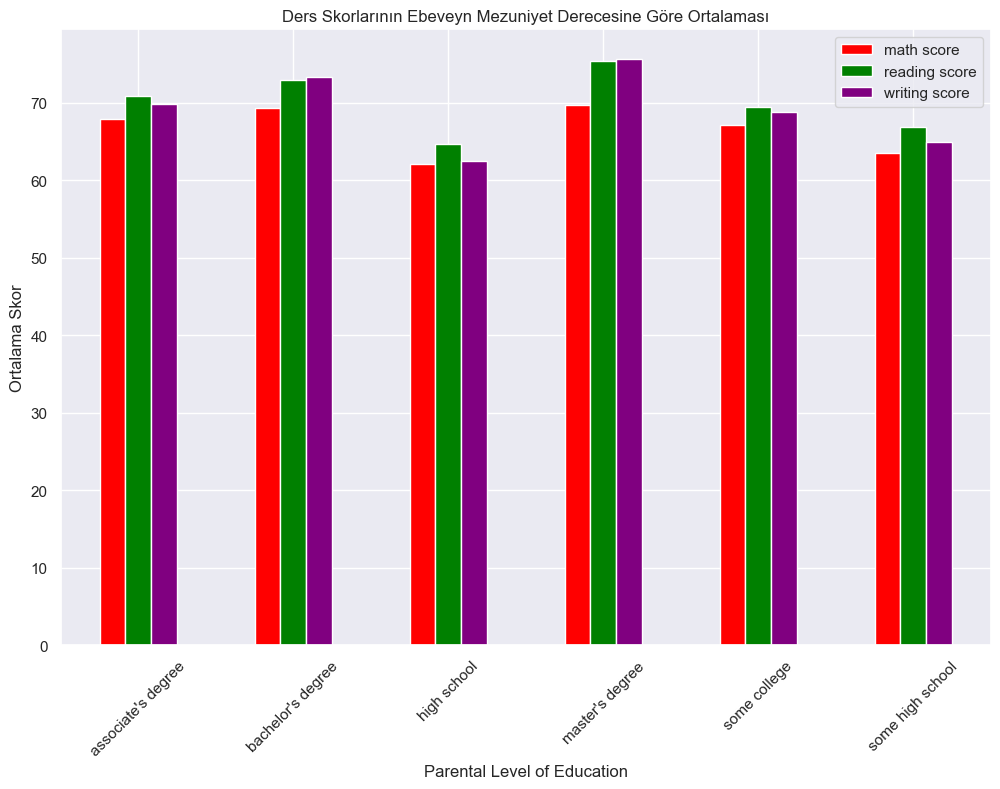

In [23]:
grouped_education.plot(kind="bar", figsize=(12, 8), color=["red","green","purple"])
plt.title("Ders Skorlarının Ebeveyn Mezuniyet Derecesine Göre Ortalaması")
plt.xlabel("Parental Level of Education")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=45)


In [24]:
## VERİ GÖRSELLEŞTİRMENİN DOĞRULUĞUNA BAKMAK İÇİN FİLTRELEME YÖNTEMİYLE MASTERS DEGREE OLANLARIN READING SCRORE ORTALAMASINA BAKTIM.
filtered_df = veri[veri["parental level of education"] == "master's degree"]
average_math_score = filtered_df["reading score"].mean()
average_math_score

75.37288135593221